# 누락데이터 처리

* 데이터가 누락되는 경우 : 데이터를 입력할 때 빠트리거나 파일 형식을 변환하는 과정에서 데이터가 소실되는 것이 주요 원인
* 일반적으로 유효한 데이터 값이 존재하지 않는 누락 데이터를 NaN(Not a Number)으로 표시
* 머신러닝 모델에 데이터 입력 전 반드시 누락 데이터 제거 혹은 다른 적절한 값으로 대체하는 과정 필요
* 누락 데이터가 많아지면 데이터의 품질이 떨어지고 머신러닝 분석 알고리즘을 왜곡하는 현상 발생

In [ ]:
#라이브러리 import
import seaborn as sns
import pandas as pd

In [ ]:
#titanic 데이터 가져오기
df = sns.load_dataset('titanic')
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## NaN 값 개수 확인

In [ ]:
#데이터프레임 요약 정보 출력 후 NaN값 개수 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
#deck 열의 NaN값 개수 확인
df.deck.value_counts(dropna=False)

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64

## 누락 데이터를 찾는 직접적인 방법
 * isnull() : 누락데이터면 True반환, 유효한 데이터가 존재하면 False 반환
 * notnull() : 유효한 데이터가 존재하면 True 반환, 누락 데이터면 False 반환

In [ ]:
#데이터프레임 첫 5행이 누락 데이터인지 여부 확인
df.head().isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [ ]:
df.head().notnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True


* 누락 데이터의 개수 확인 : isnull과 notnull을 활용할 수 있다. 
 * isnull은 반환값이 참이면 1, 거짓이면 0으로 판별
 * isnull 실행후 sum(axis=0)적용시 참(1)의 합이 구해진다. 


In [ ]:
#상위 5개 행의 누락 데이터 개수 구하기(isnull)
df.head().isnull().sum(axis=0)

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           3
embark_town    0
alive          0
alone          0
dtype: int64

In [ ]:
#상위 5개 행의 누락 데이터 개수 구하기(notnull)
df.head().notnull().sum(axis=0)

survived       5
pclass         5
sex            5
age            5
sibsp          5
parch          5
fare           5
embarked       5
class          5
who            5
adult_male     5
deck           2
embark_town    5
alive          5
alone          5
dtype: int64

In [ ]:
# for문으로 각 열의 NaN 개수 계산하기
missing_df = df.isnull()
for col in missing_df.columns:
  missing_count = missing_df[col].value_counts() #각 열의 NaN 개수 파악
  try:
    print(col, ':', [True]) #NaN 값이 있으면 개수를 출력
  except:
    print(col, ':', 0) #NaN 값이 없으면 0개 출력

survived : [True]
pclass : [True]
sex : [True]
age : [True]
sibsp : [True]
parch : [True]
fare : [True]
embarked : [True]
class : [True]
who : [True]
adult_male : [True]
deck : [True]
embark_town : [True]
alive : [True]
alone : [True]


In [ ]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## 누락 데이터 제거
 * 누락 데이터가 들어있는 열 또는 행을 삭제
 * 열 삭제 시 분석 대상이 갖는 특성(변수)를 제거
 * 행 삭제 시 분석 대상의 관측값(레코드)를 제거

* dropna() 메소드 : thresh, subset, how, axis, inplace 옵션 등

* 열삭제

In [ ]:
# 누락없는 데이터가 500개 이상인 열만 선택
# deck 열 - 891개 중 688개의 NaN값 -> 203개의 데이터 존재
# dropna() 메소드, thresh옵션 사용
df.dropna(thresh=500, axis=1, inplace=True)

* 행삭제

  * axis = 0 / axis = 1 

    0  : NaN 값이 포함된 행을 drop (default)

    1  : NaN 값이 포함된 열을 drop



 * how = 'any' / how ='all'

  any : 행 또는 열에 NaN값이 1개만 있어도 drop (default 값입니다.)

  all : 행 또는 열에 있는 모든 값이 NaN이어야 drop



 * inplace = True /  inplace = False

  True : 원본 DataFrame 자체에 dropna를 적용

  False : 원본  DataFrame는 그대로 두고 dropna를 적용한 새로운 DataFrame을 반환



 * subset = [ ]

  subset을 명시하지 않으면 DataFrame 전체(모든 행 & 모든 열에 대해 dropna를 진행

  subset을 명시하면 지정된 적힌 열의 값에 대해서만 dropna를 진행



In [ ]:
# 나이 데이터가 없는 모든 행을 삭제 (891개 중 177개가 NaN)
# dropna 메소드, subset, how, axis 옵션 활용
df_age = df.dropna(subset=['age'], how='any', axis=0) 
print(len(df_age))

714


## 누락데이터 변경

In [ ]:
# age열의 NaN 값을 삭제하지 않고 다른 나이 데이터의 평균으로 변경

In [ ]:
df = sns.load_dataset('titanic')
df.age.head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

In [ ]:
#age 열의 평균계산 (NaN값 제외, mean 메소드 활용)
age_mean = df.age.mean()
#fillna 메소드 활용 평균값으로 NaN 변경
df.age.fillna(age_mean, inplace=True)
df.age.head(10)

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: age, dtype: float64

In [ ]:
# embark_town 열의 NaN처리 : 승객들이 가장 많이 승선한 곳의 이름을 찾아 NaN값을 치환
df.loc[825:830, 'embark_town']

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829            NaN
830      Cherbourg
Name: embark_town, dtype: object

In [ ]:
mos_fruq = df.embark_town.value_counts().idxmax()
df.embark_town.fillna(mos_fruq, inplace=True)
df.loc[825:830, 'embark_town']

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829    Southampton
830      Cherbourg
Name: embark_town, dtype: object

In [ ]:
#embarked 열의 NaN값을 바로 앞에 있는 828행의 값으로 변경하기
df.loc[829, 'embarked']

nan

In [ ]:
df.embarked.fillna(method='ffill')[828:831] #바로 앞의 값으로 채움

828    Q
829    Q
830    C
Name: embarked, dtype: object

In [ ]:
df.embarked.fillna(method='bfill')[828:831] #바로 뒤의 값으로 채움

828    Q
829    C
830    C
Name: embarked, dtype: object

# 중복 데이터 처리

* 중복 데이터 확인
 * 동일한 관측값이 중복되는지 여부를 확인하려면 duplicated() 메소드 이용
 * 전에 나온 행들과 비교하여 중복되는 행이면 True, 처음 나오는 행은 False 반환

In [ ]:
df = pd.DataFrame({'c1':['a', 'a', 'b', 'a', 'b'],
                  'c2':[1, 1, 1, 2, 2],
                  'c3':[1, 1, 2, 2, 2]})
df

,c1,c2,c3
0,a,1,1
1,a,1,1
2,b,1,2
3,a,2,2
4,b,2,2


In [ ]:
#데이터 프레임 전체행에서 중복값 찾기
df.duplicated()

0    False
1     True
2    False
3    False
4    False
dtype: bool

In [ ]:
# c2열에서 중복값 찾기
df.c2.duplicated()

0    False
1     True
2     True
3    False
4     True
Name: c2, dtype: bool

* 중복 데이터 제거

In [ ]:
#중복된 행을 제거하고 고유한 관측값을 가진 행들만 보존 : drop_duplicates()
#데이터 프래임에서 중복 행을 제거
df.drop_duplicates()

,c1,c2,c3
0,a,1,1
2,b,1,2
3,a,2,2
4,b,2,2


In [ ]:
# c2,c3 열을 기준으로 중복 행을 제거(subset 옵션)
df.drop_duplicates(subset=['c2', 'c3'])

,c1,c2,c3
0,a,1,1
2,b,1,2
3,a,2,2


# 데이터 표준화

## 단위 변경

* 같은 데이터셋에서 서로 다른 측정 단위 사용 시 전체 데이터의 일관성 측면에서 문제 발생
* 측정 단위를 동일하게 맞출 필요
* 외국 데이터를 가져오면 국내에서 잘 사용하지 않는 도량형 단위 많이 사용
* 영미권의 마일드, 야드, 온스 등은 한국의 미터, 평, 그램 등으로 변환

In [ ]:
# mpg 데이터프래임의 mpg(mile per gallon)을 kpl(kilometer per liter)로 변환
df = pd.read_csv('/content/drive/MyDrive/ Encore Prac/auto-mpg.csv', header=None)
df

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [ ]:
# 데이터 프레임 열 이름 변경
df.columns =  ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [ ]:
# mpg(mile per gallon)을 kpl(kilometer per liter)로 변환 후 소수점 둘째자리까지 반올림
df['kpl'] = df.mpg * 0.425 
df['kpl'] = df.kpl.round(2)

In [ ]:
# kpl 열 확인
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,kpl
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,7.65
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,6.38
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,7.65
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,6.80
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,7.22
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl,11.48
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup,18.70
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage,13.60
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger,11.90


## 데이터타입 변경

* 숫자가 문자열(object)로 저장된 경우 숫자형(int or float)으로 변환 필요
 * dtypes 속성을 사용해 자료형 확인
 * info() 메소드도 활용 가능

In [ ]:
# df 데이터프레임 데이터타입 확인
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
name             object
kpl             float64
dtype: object

In [ ]:
# horsepower 열 데이터타입을 float으로 바꾸기
# ValueError: could not convert string to float: '?' 
df.horsepower.astype('float64')

ValueError: ignored

In [ ]:
# horsepower 열의 유니크 값 확인
df.horsepower.unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [ ]:
import numpy as np
# horsepower 열의 '?' 값을 nan으로 변경
df.horsepower.replace('?', np.nan, inplace=True)

In [ ]:
# horsepower 열 데이터타입을 float으로 바꾸기
# 성공!
df.horsepower = df.horsepower.astype('float64')

In [ ]:
# df의 데이터타입 확인
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
name             object
dtype: object

* 범주형으로 변경 : 적은 수의 고유값이 반복적으로 나타나는 경우에는 범주형(category)데이터를 표현하는 것이 효율적

In [ ]:
# origin 열 데이터타입 확인
df.origin.dtypes

dtype('int64')

In [ ]:
# origin 열의 유니크 값 확인 : 빈도순으로 정렬
df.origin.unique()

array([1, 3, 2])

In [ ]:
# 값 카운트
df.origin.value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [ ]:
#데이터 명 변경
df.origin.replace({1:'USA', 2:'EU', 3: 'JAPAN'}, inplace=True)
df.origin.unique()

array(['USA', 'JAPAN', 'EU'], dtype=object)

In [ ]:
# origin 열 범주형 데이터로 변경
df.origin = df.origin.astype('category')
df.origin.dtypes

CategoricalDtype(categories=['EU', 'JAPAN', 'USA'], ordered=False)

In [ ]:
# model year 열 데이터타입 확인
df['model year'].dtypes

dtype('int64')

In [ ]:
df['model year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

In [ ]:
df['model year'] = df['model year'].astype('category')
df['model year'].dtypes

CategoricalDtype(categories=[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], ordered=False)

## 범주형(category) 데이터 처리

### 구간 분할
* 연속형 데이터를 그대로 사용하기 보다는 일정한 구간(bin)으로 나눠서 분석하는 것이 효율적인 경우가 있다. 이를 구간분할(binning) 이라고 하고 pandas의 cut 함수를 사용

* numpy의 histogram() 함수

In [ ]:
# horsepower 열의 NaN 삭제
df.dropna(subset=['horsepower'], inplace=True)
df.horsepower.isna().sum()

0

* np.histogram 함수 사용해 horsepower 열을 bins 옵션으로 3개로 분리 실행

In [ ]:
import numpy as np
np.histogram(df.horsepower, bins=3)

(array([257, 103,  32]),
 array([ 46.        , 107.33333333, 168.66666667, 230.        ]))

In [ ]:
# bins : 구간 분할 개수 
count, bin_dividers = np.histogram(df.horsepower, bins=3)

In [ ]:
count

array([257, 103,  32])

In [ ]:
bin_dividers

array([ 46.        , 107.33333333, 168.66666667, 230.        ])

In [ ]:
print(df.horsepower.min())
print(df.horsepower.max())

46.0
230.0


In [ ]:
# 3개의 bin에 이름 지정
bin_names = ['저출력', '보통출력', '고출력']

In [ ]:
# pd.cut 함수로 각 데이터를 3개의 bin에 할당
df['hp_bin'] = pd.cut(x=df.horsepower, 
                      bins = bin_dividers, #bins : 경계값 옵션
                      labels= bin_names, #labels : bin에 이름 붙이기                
                      include_lowest=True) #include_lowest : 첫 경계값 포함 옵션

In [ ]:
# hp_bin 열 확인
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,hp_bin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,보통출력
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,보통출력
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,보통출력
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,보통출력
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,보통출력
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl,저출력
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup,저출력
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage,저출력
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger,저출력


### 더미 변수


* 앞에서 변경한 범주형 데이터는 머신러닝 알고리즘에 바로 사용할 수 없음
* 컴퓨터가 인식 가능한 값으로 변환 필요
* 이럴 때 숫자 0 또는 1로 표현되는 더미 변수(dummy variable)를 사용
* 0, 1은 수의 크고 작음을 나타내는 것이 아니라 어떤 특성(feature) 여부만 표시

In [ ]:
# hp_bin 열의 범주형 데이터를 더미 변수로 변환
pd.get_dummies(df.hp_bin)

,저출력,보통출력,고출력
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
393,1,0,0
394,1,0,0
395,1,0,0
396,1,0,0


## 정규화

* 각 변수(열)에 들어 있는 숫자 데이터의 상대적 크기 차이 때문에 머신러닝(회귀) 분석 결과가 달라짐 -> 숫자 데이터의 상대적인 크기 차이 제거 필요
* 각 열에 속하는 데이터 값을 동일한 크기 기준으로 나눈 비율로 나타내는 것이 정규화 
* 정규화 과정을 거친 데이터의 범위는 0에서 1 또는 -1에서 1

#### 정규화 방법
1. 각 변수의 데이터를 해당 열의 최대값으로 나누는 방법 
  *  horsepower 열의 최대값은 230인데 최대값을 정규화하면 1 
2. 각 변수의 데이터 중 최대값과 최소값을 뺀 값으로 나누는 방법 
  * (최대값-데이터) / (최대값-최소값) 계산하면 최대값은 1, 최소값은 0

In [ ]:
hp_max = df.horsepower.max()
hp_min = df.horsepower.min()

In [ ]:
print((df.horsepower/ hp_max).max())
print((df.horsepower/ hp_max).min())

1.0
0.2


In [ ]:
(hp_max - df.horsepower) / (hp_max - hp_min)

0      0.543478
1      0.353261
2      0.434783
3      0.434783
4      0.489130
         ...   
393    0.782609
394    0.967391
395    0.793478
396    0.820652
397    0.804348
Name: horsepower, Length: 398, dtype: float64

In [ ]:
print(((hp_max - df.horsepower) / (hp_max - hp_min)).max())
print(((hp_max - df.horsepower) / (hp_max - hp_min)).min())

1.0
0.0


# 시계열 데이터

* 판다스는 주식, 환율 등 금융 데이터를 다루기 위해 개발
* 시계열(time series) 데이터를 다루는 여러가지 유용한 기능 제공
* 시계열 데이터를 데이터프레임의 행 인덱스로 사용하면 시간으로 기록된 데이터 분석에 매우 편리
* 판다스 시간 표시 방식 중 시계열 데이터 표현에 자주 이용되는 두가지 유형
 * 특정한 시점을 기록하는 Timestamp
 * 두 시점 사이의 일정한 기간을 나타내는 Period

#### 다른 자료형을 시계열 객체로 변환

* 문자열을 Timestamp로 변환
 * 판다스 to_datetime() 함수는 다른 자료형을 판다스 Timestamp를 나타내는 datetime64 자료형으로 변환

In [ ]:
# stock-data.csv 파일 불러오기
df = pd.read_csv('/content/drive/MyDrive/ Encore Prac/stock-data.csv')
df.head(5)

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [ ]:
# Date 열 데이터 및 타입 확인
df.Date

0     2018-07-02
1     2018-06-29
2     2018-06-28
3     2018-06-27
4     2018-06-26
5     2018-06-25
6     2018-06-22
7     2018-06-21
8     2018-06-20
9     2018-06-19
10    2018-06-18
11    2018-06-15
12    2018-06-14
13    2018-06-12
14    2018-06-11
15    2018-06-08
16    2018-06-07
17    2018-06-05
18    2018-06-04
19    2018-06-01
Name: Date, dtype: object

In [ ]:
df.dtypes

Date      object
Close      int64
Start      int64
High       int64
Low        int64
Volume     int64
dtype: object

In [ ]:
# Date열을 Timestamp 객체로 변경해서 new_Date 열에 저장
df['new_Date'] = pd.to_datetime(df.Date) 

In [ ]:
df.new_Date

0    2018-07-02
1    2018-06-29
2    2018-06-28
3    2018-06-27
4    2018-06-26
5    2018-06-25
6    2018-06-22
7    2018-06-21
8    2018-06-20
9    2018-06-19
10   2018-06-18
11   2018-06-15
12   2018-06-14
13   2018-06-12
14   2018-06-11
15   2018-06-08
16   2018-06-07
17   2018-06-05
18   2018-06-04
19   2018-06-01
Name: new_Date, dtype: datetime64[ns]

In [ ]:
df.new_Date[0]

Timestamp('2018-07-02 00:00:00')

In [ ]:
type(df.new_Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
# index를 new_Date로 변경
df.set_index('new_Date', inplace=True)

In [ ]:
# Date 열 삭제
df.drop('Date', axis=1)

,Close,Start,High,Low,Volume,new_Date
0,10100,10850,10900,10000,137977,2018-07-02
1,10700,10550,10900,9990,170253,2018-06-29
2,10400,10900,10950,10150,155769,2018-06-28
3,10900,10800,11050,10500,133548,2018-06-27
4,10800,10900,11000,10700,63039,2018-06-26
5,11150,11400,11450,11000,55519,2018-06-25
6,11300,11250,11450,10750,134805,2018-06-22
7,11200,11350,11750,11200,133002,2018-06-21
8,11550,11200,11600,10900,308596,2018-06-20
9,11300,11850,11950,11300,180656,2018-06-19


In [ ]:
df.index

DatetimeIndex(['2018-07-02', '2018-06-29', '2018-06-28', '2018-06-27',
               '2018-06-26', '2018-06-25', '2018-06-22', '2018-06-21',
               '2018-06-20', '2018-06-19', '2018-06-18', '2018-06-15',
               '2018-06-14', '2018-06-12', '2018-06-11', '2018-06-08',
               '2018-06-07', '2018-06-05', '2018-06-04', '2018-06-01'],
              dtype='datetime64[ns]', name='new_Date', freq=None)

* Timestamp를 Period로 변환
 * 판다스 to_period는 일정한 기간을 나타내는 Period 객체로 Timestamp 객체를 변환할 수 있음
 * freq 옵션에 기준이 되는 기간 설정

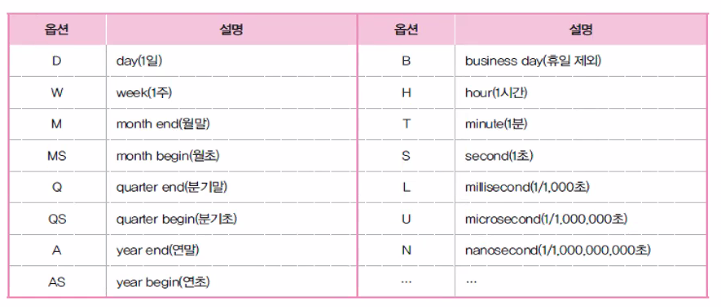

In [ ]:
#문자열 데이터(시리즈객체)를 판다스 Timestamp로 변환
dates = ['2019-01-01', '2020-03-01', '2021-06-01']
ts_dates = pd.to_datetime(dates)
ts_dates

DatetimeIndex(['2019-01-01', '2020-03-01', '2021-06-01'], dtype='datetime64[ns]', freq=None)

In [ ]:
#Timestamp를 Period로 변환
pr_day = ts_dates.to_period(freq='D') #day 옵션(년+월+일)
print(pr_day)
pr_month = ts_dates.to_period(freq='M') #month 옵션(년+월)
print(pr_month)
pr_year = ts_dates.to_period(freq='A') #year 옵션(년)
print(pr_year)

PeriodIndex(['2019-01-01', '2020-03-01', '2021-06-01'], dtype='period[D]')
PeriodIndex(['2019-01', '2020-03', '2021-06'], dtype='period[M]')
PeriodIndex(['2019', '2020', '2021'], dtype='period[A-DEC]')


#### 시계열 데이터 만들기

* Timestamp 배열은 여러 개의 날짜가 들어 있는 배열 형태의 시계열 데이터 생성
* data_range 
 * (start: 날짜 범위의 시작, end: 날짜 범위의 끝, periods: 생성할 타임스템프의 개수, freq : 시간 간격, tz: timezone(Asia/Seoul)

In [ ]:
# 2022-01-01 부터 월의 첫날짜를 한달 간격으로 6개 생성
pd.date_range(start='2022-01-01', periods=6, freq='MS', tz='Asia/Seoul') 

DatetimeIndex(['2022-01-01 00:00:00+09:00', '2022-02-01 00:00:00+09:00',
               '2022-03-01 00:00:00+09:00', '2022-04-01 00:00:00+09:00',
               '2022-05-01 00:00:00+09:00', '2022-06-01 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='MS')

In [ ]:
# 한달 간격으로 각 달의 마지막 날짜를 6개 생성
pd.date_range(start='2022-01-01', periods=6, freq='M') 

DatetimeIndex(['2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30'],
              dtype='datetime64[ns]', freq='M')

In [ ]:
# 분기(3개월) 간격, 월의 마지막 날짜를 6개 생성
pd.date_range(start='2022-01-01', periods=6, freq='3M')  #freq='3M': 해당 날짜를 기준으로 분기 길이를 자유롭게 조정가능

DatetimeIndex(['2022-01-31', '2022-04-30', '2022-07-31', '2022-10-31',
               '2023-01-31', '2023-04-30'],
              dtype='datetime64[ns]', freq='3M')

In [ ]:
pd.date_range(start='2022-01-01', periods=6, freq='Q') # freq='Q': 정해져 있는 분기말 날짜 

DatetimeIndex(['2022-03-31', '2022-06-30', '2022-09-30', '2022-12-31',
               '2023-03-31', '2023-06-30'],
              dtype='datetime64[ns]', freq='Q-DEC')

* period_range() : 여러 개의 기간이 들어 있는 시계열 데이터 생성

In [ ]:
#period 배열 만들기 
# 2022-01-01부터 한달 길이 객체 3개 생성
pd.period_range(start='2022-01-01', periods=3, freq='M') 

PeriodIndex(['2022-01', '2022-02', '2022-03'], dtype='period[M]')

In [ ]:
# 2022-01-01부터 2시간 길이 객체 3개 생성
pd.period_range(start='2022-01-01', periods=3, freq='2H')

PeriodIndex(['2022-01-01 00:00', '2022-01-01 02:00', '2022-01-01 04:00'], dtype='period[2H]')

#### 날짜 데이터 분리

In [ ]:
# df의 인덱스 초기화 후 확인
df = df.reset_index()
df.head(3)

,level_0,index,new_Date,Date,Close,Start,High,Low,Volume,year,month,day
0,0,0,2018-07-02,2018-07-02,10100,10850,10900,10000,137977,2018,7,2
1,1,1,2018-06-29,2018-06-29,10700,10550,10900,9990,170253,2018,6,29
2,2,2,2018-06-28,2018-06-28,10400,10900,10950,10150,155769,2018,6,28


In [ ]:
# Timestamp객체의 연, 월, 일 각각 추축해서 새로운 열 생성
df['year'] = df['new_Date'].dt.year
df['month'] = df['new_Date'].dt.month
df['day'] = df['new_Date'].dt.day

In [ ]:
df.head(4)

,Date,Close,Start,High,Low,Volume,new_Date,year,month,day
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,2018,7,2
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29,2018,6,29
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28,2018,6,28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6,27


In [ ]:
# Timestamp를 Period로 변환하여 년원일 표기 변경하기, freq 옵션 사용
df['Date_yr'] = df['new_Date'].dt.to_period(freq='A')
df['Date_m'] = df['new_Date'].dt.to_period(freq='M')

In [ ]:
# 추출한 날짜 정보 Date_m 열을 데이터 프레임의 행 인덱스로 지정
df.set_index('Date_m', inplace=True)
df.head(3)

,Date,Close,Start,High,Low,Volume,new_Date,year,month,day,Date_yr
Date_m,,,,,,,,,,,
2018-07,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,2018,7,2,2018
2018-06,2018-06-29,10700,10550,10900,9990,170253,2018-06-29,2018,6,29,2018
2018-06,2018-06-28,10400,10900,10950,10150,155769,2018-06-28,2018,6,28,2018


#### 날짜 인덱스 활용
* Timestamp 열 > 행 인덱스 DatatimeIndex 속성
* Period 열 > 행 인덱스 PeriodIndex 속성
* 시계열 데이터 인덱싱과 슬라이싱은 날짜 인덱스 사용

In [ ]:
# stock-data.csv 파일 불러오기
df = pd.read_csv('/content/drive/MyDrive/ Encore Prac/stock-data.csv')
# Date열을 Timestamp 객체로 변경해서 new_Date 열에 저장
df['new_Date'] = pd.to_datetime(df.Date)
df.set_index('new_Date', inplace=True)
df.drop('Date', axis=1, inplace=True)

In [ ]:
# 2018년 데이터 인덱싱
df.loc['2018'].head(3)

,Close,Start,High,Low,Volume
new_Date,,,,,
2018-07-02,10100,10850,10900,10000,137977
2018-06-29,10700,10550,10900,9990,170253
2018-06-28,10400,10900,10950,10150,155769


In [ ]:
# 2018년 6월 데이터 인덱싱
df.loc['2018-06'].head(3)
df['2018-06'].head(3)  #열 지정 방식으로도 인덱싱 가능

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  


,Close,Start,High,Low,Volume
new_Date,,,,,
2018-06-29,10700,10550,10900,9990,170253
2018-06-28,10400,10900,10950,10150,155769
2018-06-27,10900,10800,11050,10500,133548


In [ ]:
# 2018년 6월의 Start, High 열 데이터 인덱싱
df.loc['2018-06', ['Start', 'High']].head(3)

,Start,High
new_Date,,
2018-06-29,10550,10900
2018-06-28,10900,10950
2018-06-27,10800,11050


In [ ]:
df.loc['2018-06-15']

,Close,Start,High,Low,Volume
new_Date,,,,,
2018-06-15,13400,13600,13600,12900,201376


In [ ]:
# 데이터 정렬 후 구간 인덱싱
df.sort_index().loc['2018-06-20': '2018-06-25']

,Close,Start,High,Low,Volume
new_Date,,,,,
2018-06-20,11550,11200,11600,10900,308596
2018-06-21,11200,11350,11750,11200,133002
2018-06-22,11300,11250,11450,10750,134805
2018-06-25,11150,11400,11450,11000,55519
